# Requesting Argo REFERENCE data from Ifremer erddap

Show case how to retrieve data from the Argo reference dataset through the Ifremer erddap.

Examples:

- Plot REFERENCE data available around 200db depth for a single year in a specific region
- Data fetching for a specific profile and superimpose nearby REFERENCE data


***
Script prepared by [Guillaume Maze](http://github.com/gmaze) (Mar. 2020)

In [1]:
import sys, os
import numpy as np
import xarray as xr

try:
    import argopy
except ModuleNotFoundError:
    !pip install git+http://github.com/euroargodev/argopy.git@master
    import argopy
print("argopy:", argopy.__version__)
from argopy import DataFetcher as ArgoDataFetcher

# For plots:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

argopy: 0.1.1


# Create the Argo data loader instance

Here, we need to specify the dataset from which to retrieve data, the ``reference`` one.

This is done with the ``ds='ref'`` option.

Let's create a data loader instance that will cache data locally for later re-use.

In [2]:
# argo_loader = ArgoDataFetcher(ds='ref', cachedir='tmp') # Use cache to save fetched data to limit data transfer usage
argo_loader = ArgoDataFetcher(ds='ref')
argo_loader

<datafetcher 'Not initialised'>
Backend: erddap
Fetchers: profile, float, region
User mode: standard

# Map of REFERENCE data around 200db depth for a single year

In [3]:
box = [-80., 0., 10., 65., 200-5., 200+5., '2018-01-01','2018-12-31']
ds = argo_loader.region(box).to_xarray()
ds

<xarray.Dataset>
Dimensions:          (N_POINTS: 2124)
Coordinates:
    TIME             (N_POINTS) datetime64[ns] 2018-01-01T05:38:39 ... 2018-09-13T11:39:30
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 5 ... 2119 2120 2121 2122 2123
    LATITUDE         (N_POINTS) float64 53.62 53.62 53.62 ... 22.04 22.04 22.04
    LONGITUDE        (N_POINTS) float64 -44.02 -44.02 -44.02 ... -49.26 -49.26
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 60 60 60 60 60 128 ... 77 77 77 77 77 77
    PLATFORM_NUMBER  (N_POINTS) int64 5904771 5904771 ... 3901857 3901857
    PRES             (N_POINTS) float64 196.4 198.4 200.4 ... 202.4 203.5 204.7
    PSAL             (N_POINTS) float64 34.77 34.77 34.77 ... 36.68 36.67 36.67
    PTMP             (N_POINTS) float64 4.172 4.161 4.147 ... 19.12 19.11 19.1
    TEMP             (N_POINTS) float64 4.186 4.175 4.161 ... 19.16 19.14 19.14
Attributes:
    DATA_ID:              ARGO_Reference
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2020/04/06
    Fetched_constraints:  ref_[x=-80.00/0.00; y=10.00/65.00; z=195.0/205.0; t...
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats-re...

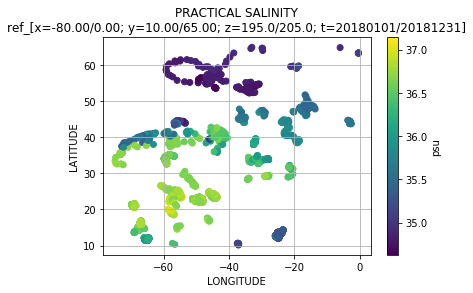

In [4]:
plt.scatter(ds['LONGITUDE'], ds['LATITUDE'], c=ds['PSAL'])
plt.colorbar(label=ds['PSAL'].attrs['units'])
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.gca().grid()
plt.title("%s\n%s" % (ds['PSAL'].attrs['long_name'], ds.attrs['Fetched_constraints']));

# Example of data fetching for a specific profile and superimpose nearby REFERENCE data

We first need to retrieve data from a regular Argo float.

This is done with the ``ds='phy'`` option. Note that this was not done in the previous notebooks because it is the default option.


In [5]:
ds = ArgoDataFetcher(ds='phy').profile(6902746, 12).to_xarray()
ds

<xarray.Dataset>
Dimensions:          (N_POINTS: 108)
Coordinates:
    LONGITUDE        (N_POINTS) float64 -59.24 -59.24 -59.24 ... -59.24 -59.24
    TIME             (N_POINTS) datetime64[ns] 2017-09-01T06:53:00 ... 2017-09-01T06:53:00
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 5 6 ... 102 103 104 105 106 107
    LATITUDE         (N_POINTS) float64 18.8 18.8 18.8 18.8 ... 18.8 18.8 18.8
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 12 12 12 12 12 12 12 ... 12 12 12 12 12 12
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 6902746 6902746 ... 6902746 6902746
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 3.0 4.0 5.0 ... 1.963e+03 1.989e+03
    PRES_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) float64 35.02 35.03 35.03 ... 34.99 34.99 34.99
    PSAL_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float64 28.9 28.9 28.9 ... 3.771 3.734 3.693
    TEMP_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2020/04/06
    Fetched_constraints:  phy_WMO6902746_CYC0012
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats.cs...
    history:              Variables filtered according to DATA_MODE; Variable...

In [6]:
# Define a rectangular box around the profile to examine:
dx, dy = 4, 4 # Size of the box around the profile
reference_box = [np.min(ds['LONGITUDE']).values-dx, np.max(ds['LONGITUDE']).values+dx,
                 np.min(ds['LATITUDE']).values-dy, np.max(ds['LATITUDE']).values+dy,
                 0, 2000, 
                 '2014-09-01','2019-09-01']

# Retrieve REFERENCE data for this box:
ds_ref = ArgoDataFetcher(ds='ref').region(reference_box).to_xarray()
ds_ref

<xarray.Dataset>
Dimensions:          (N_POINTS: 16992)
Coordinates:
    TIME             (N_POINTS) datetime64[ns] 2014-09-10T10:03:18 ... 2018-03-31T06:49:00
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 ... 16988 16989 16990 16991
    LATITUDE         (N_POINTS) float64 20.27 20.27 20.27 ... 20.98 20.98 20.98
    LONGITUDE        (N_POINTS) float64 -56.45 -56.45 -56.45 ... -56.03 -56.03
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 158 158 158 158 158 158 ... 52 52 52 52 52
    PLATFORM_NUMBER  (N_POINTS) int64 1901460 1901460 ... 6902757 6902757
    PRES             (N_POINTS) float64 5.0 10.0 15.0 ... 1.964e+03 1.98e+03
    PSAL             (N_POINTS) float64 35.1 35.57 35.63 ... 35.01 35.0 35.0
    PTMP             (N_POINTS) float64 28.57 28.69 28.66 ... 3.629 3.586 3.545
    TEMP             (N_POINTS) float64 28.58 28.69 28.67 ... 3.788 3.746 3.706
Attributes:
    DATA_ID:              ARGO_Reference
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2020/04/06
    Fetched_constraints:  ref_[x=-63.24/-55.24; y=14.80/22.80; z=0.0/2000.0; ...
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats-re...

## Plot profile and surrounding REFERENCE data

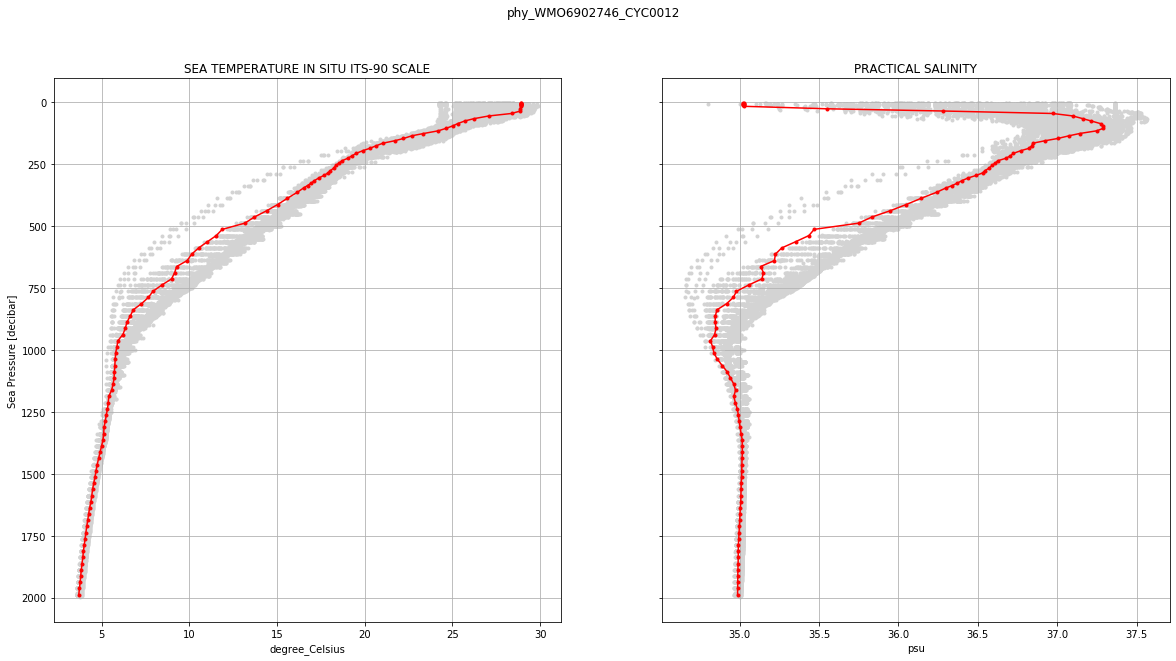

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
ax = np.array(ax).flatten()

ix = 0
ax[ix].plot(ds['TEMP'], ds['PRES'], 'r.-')
ax[ix].plot(ds_ref['TEMP'], ds_ref['PRES'], '.', color='lightgray', zorder=0)

ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel(ds['TEMP'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP'].attrs['long_name'])

ix += 1
ax[ix].plot(ds['PSAL'], ds['PRES'], 'r.-')
ax[ix].plot(ds_ref['PSAL'], ds_ref['PRES'], '.', color='lightgray', zorder=0)
ax[ix].grid()
ax[ix].set_xlabel(ds['PSAL'].attrs['units'])
ax[ix].set_title(ds['PSAL'].attrs['long_name']);

fig.suptitle(ds.attrs['Fetched_constraints']);

## Map of profile and surrounding REFERENCE data location

In [8]:
# Get reference profile positions (by floats):
TRAJ = {}
for wmo in np.unique(ds_ref['PLATFORM_NUMBER']):
    traj = []
    for cyc in np.unique(ds_ref.where(ds_ref['PLATFORM_NUMBER']==wmo, drop=True)['CYCLE_NUMBER']):
        this = ds_ref.where(ds_ref['PLATFORM_NUMBER']==wmo, drop=True)\
                       .where(ds_ref['CYCLE_NUMBER']==cyc, drop=True)
        traj.append([np.round(np.unique(this['LONGITUDE'])[0],2),np.round(np.unique(this['LATITUDE'])[0],2)])
    TRAJ[wmo] = np.array(traj)
print("WMOs in the reference dataset:\n", TRAJ.keys())

WMOs in the reference dataset:
 dict_keys([1901460, 1901661, 3901858, 4901222, 6901728, 6902746, 6902757])


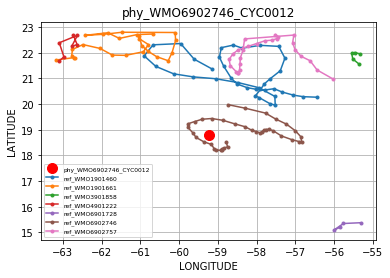

In [9]:
# Plot
this = ds.reset_coords().groupby('CYCLE_NUMBER').min()
plt.plot(this['LONGITUDE'], this['LATITUDE'], 'r.', markersize=20, label=ds.attrs['Fetched_constraints'])

for wmo in TRAJ:
    plt.plot(TRAJ[wmo][:,0], TRAJ[wmo][:,1], '.-', label= 'ref_WMO' + str(wmo))

plt.legend(fontsize=6)
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.gca().grid()
plt.title(ds.attrs['Fetched_constraints']);

***
This work is part and was supported by the following projects:
<div>
<img src="https://avatars1.githubusercontent.com/u/58258213?s=460&v=4" width="70"/>
<img src="http://www.argo-france.fr/wp-content/uploads/2019/10/Argo-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>